# Homework Assignment: Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

## Data: Credit Card User Data
For this assignment, we use credit card data from 9000 users. Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [2]:
#get the data
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 46 (delta 9), reused 42 (delta 5), pack-reused 0
Unpacking objects: 100% (46/46), done.


In [2]:
data = pd.read_csv("DATA/CC GENERAL.csv")

In [3]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Task 1: clean the data and perform a basic EDA
* check for missing values and NAN
* compute basic statistics
* check for carrelations in the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CUST_ID,8950,8950,C10001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BALANCE,8950.0,NaN,NaN,NaN,1564.474828,2081.531879,0.0,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,NaN,NaN,NaN,0.877271,0.236904,0.0,0.888889,1.0,1.0,1.0
PURCHASES,8950.0,NaN,NaN,NaN,1003.204834,2136.634782,0.0,39.635,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.0,NaN,NaN,NaN,592.437371,1659.887917,0.0,0.0,38.0,577.405,40761.25
INSTALLMENTS_PURCHASES,8950.0,NaN,NaN,NaN,411.067645,904.338115,0.0,0.0,89.0,468.6375,22500.0
CASH_ADVANCE,8950.0,NaN,NaN,NaN,978.871112,2097.163877,0.0,0.0,0.0,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.490351,0.401371,0.0,0.083333,0.5,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,NaN,NaN,NaN,0.202458,0.298336,0.0,0.0,0.083333,0.3,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,NaN,NaN,NaN,0.364437,0.397448,0.0,0.0,0.166667,0.75,1.0


Drop unique columns

In [6]:
data = data.drop('CUST_ID', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Evaluate Outliers

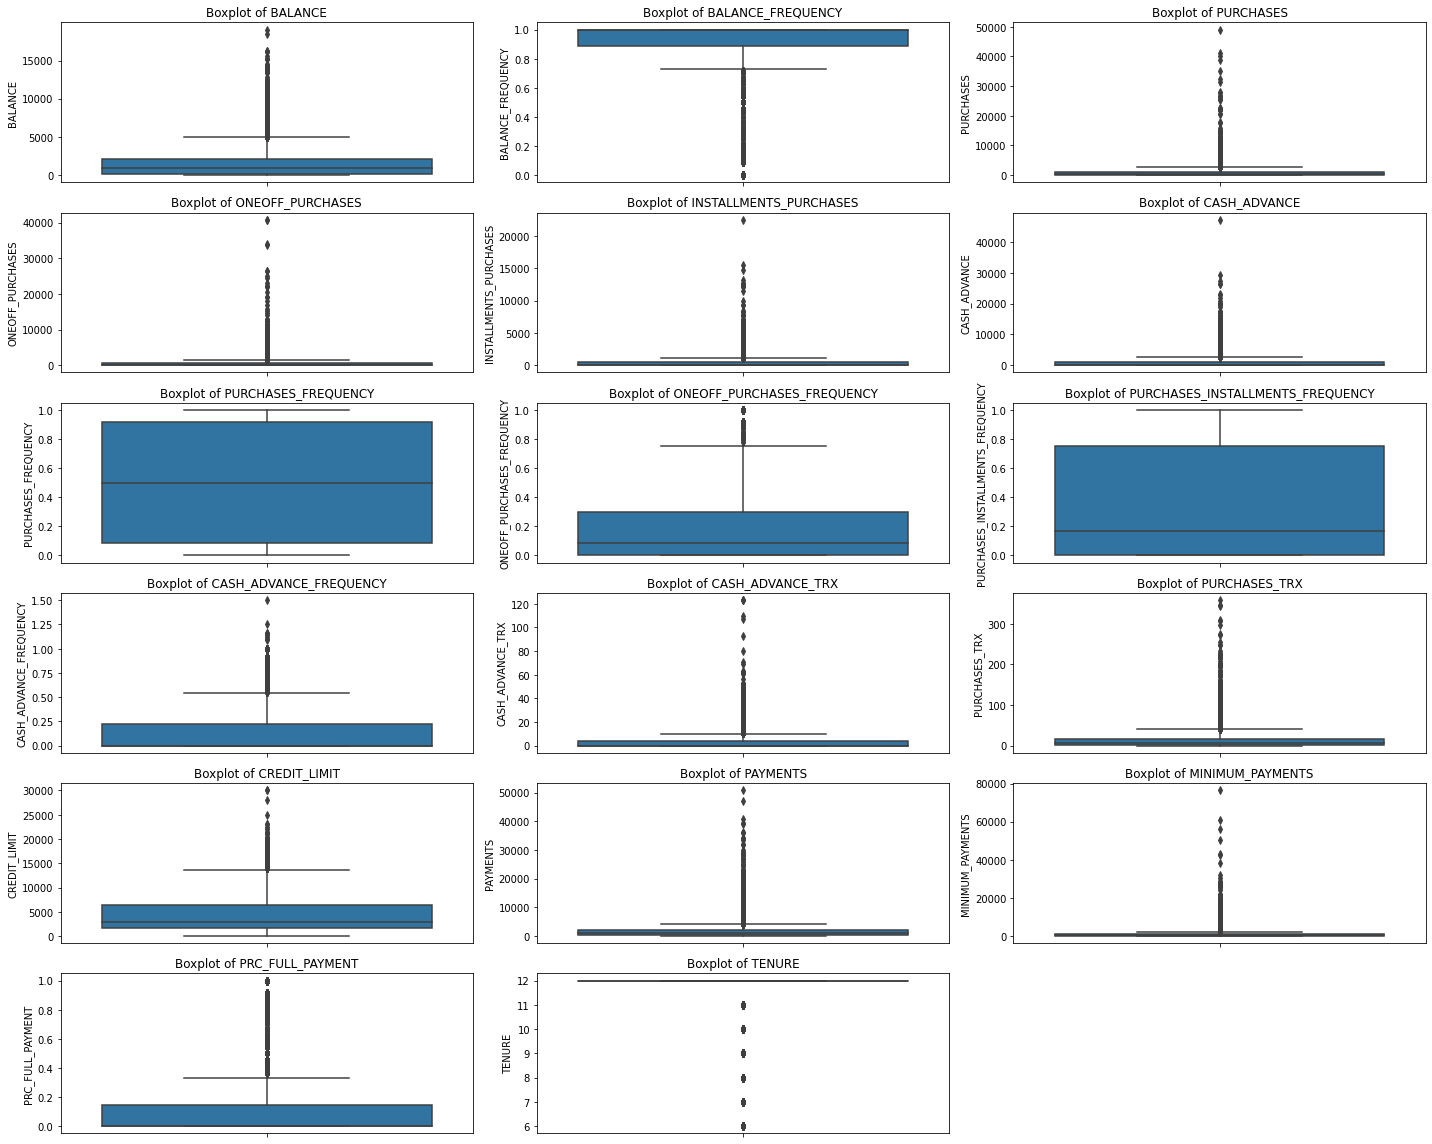

In [7]:
plt.figure(figsize = (20,16))
features = data.columns
for i in range(len(features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = data[features[i]], data = data)
    plt.title(f"Boxplot of {features[i]}")
    plt.tight_layout()

In [8]:
def detect_outliers(col):
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

remove Outliers

In [9]:
for i in features:
    lower_range, upper_range = detect_outliers(data[i])
    data[i] = np.where(data[i] > upper_range, upper_range, data[i])
    data[i] = np.where(data[i] < lower_range, lower_range, data[i])

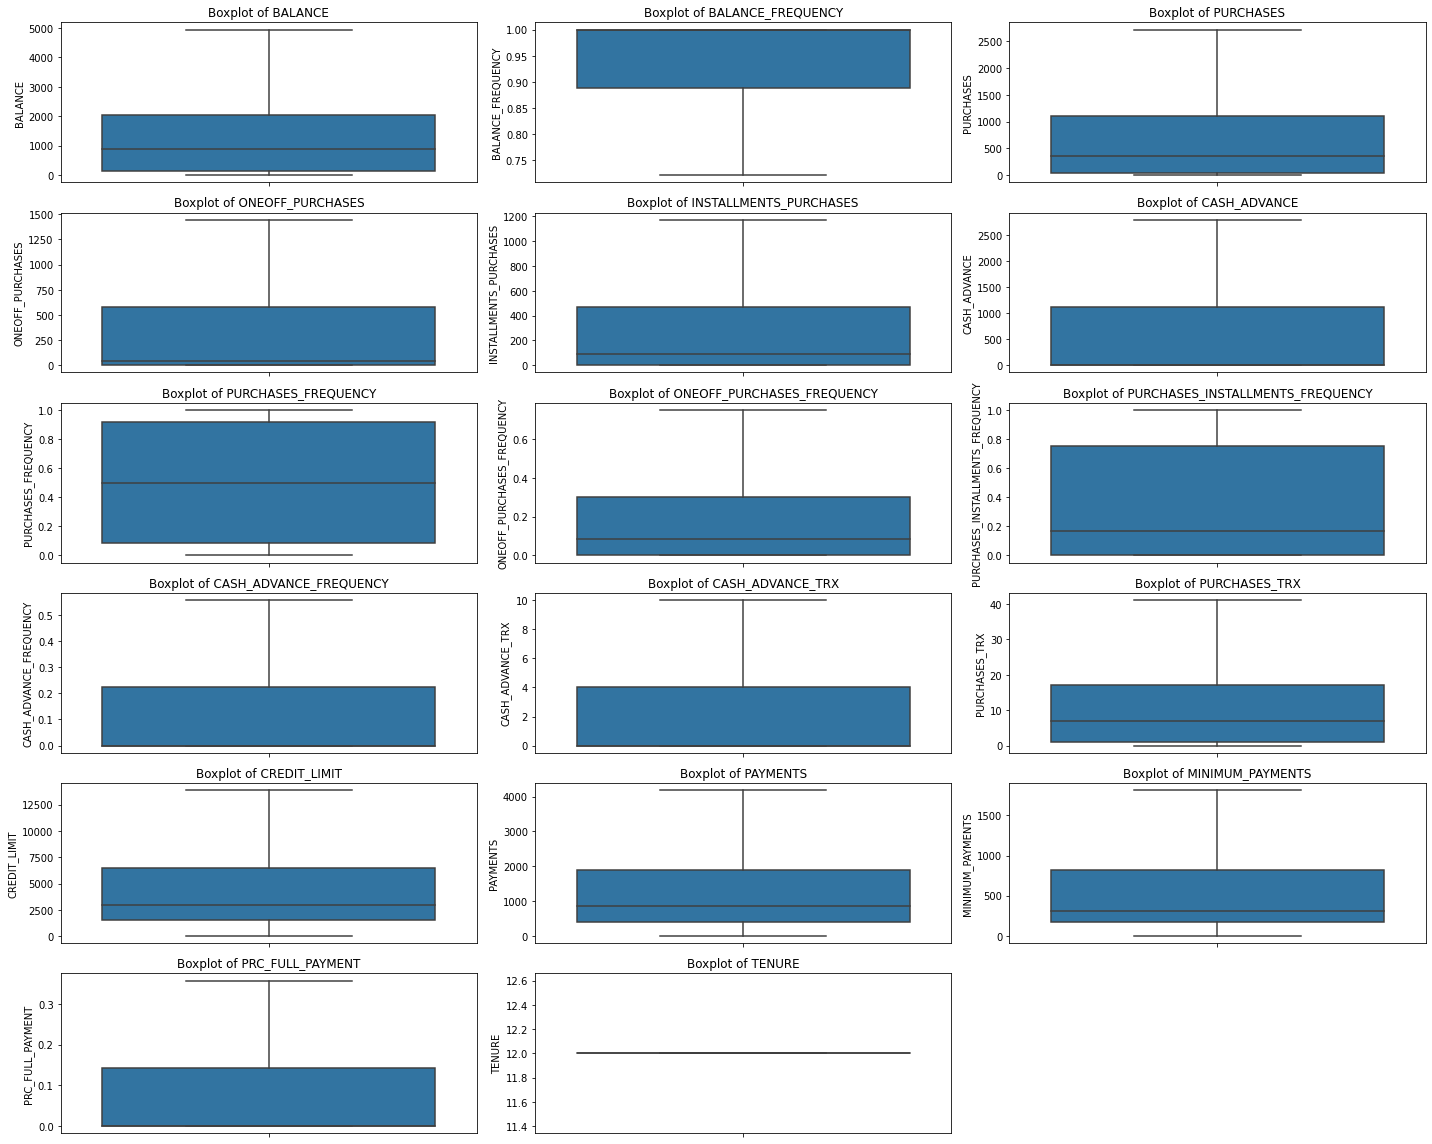

In [10]:
plt.figure(figsize = (20,16))
for i in range(len(features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = data[features[i]], data = data)
    plt.title(f"Boxplot of {features[i]}")
    plt.tight_layout()

remove missing values

In [11]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
data.MINIMUM_PAYMENTS = data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.median())
data.CREDIT_LIMIT = data.CREDIT_LIMIT.fillna(data.CREDIT_LIMIT.median())

apply StandardScaler

In [13]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(data)
data_scaled = pd.DataFrame(scaler.transform(data),columns = data.columns)
data_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,0.281313,0.311058,0.0,0.025953,0.176694,0.415572,1.0
BALANCE_FREQUENCY,8950.0,0.753713,0.399541,0.0,0.600000,1.000000,1.000000,1.0
PURCHASES,8950.0,0.271423,0.323850,0.0,0.014594,0.133025,0.408756,1.0
ONEOFF_PURCHASES,8950.0,0.245483,0.354568,0.0,0.000000,0.026325,0.400000,1.0
INSTALLMENTS_PURCHASES,8950.0,0.252260,0.338156,0.0,0.000000,0.075965,0.400000,1.0
CASH_ADVANCE,8950.0,0.241500,0.358591,0.0,0.000000,0.000000,0.400000,1.0
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.083333,0.500000,0.916667,1.0
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.246364,0.340890,0.0,0.000000,0.111111,0.400000,1.0
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.166667,0.750000,1.0
CASH_ADVANCE_FREQUENCY,8950.0,0.226910,0.310818,0.0,0.000000,0.000000,0.400000,1.0


calculate correlation matrix

In [14]:
# Compute the correlation matrix
corr = data_scaled.corr()

<AxesSubplot:>

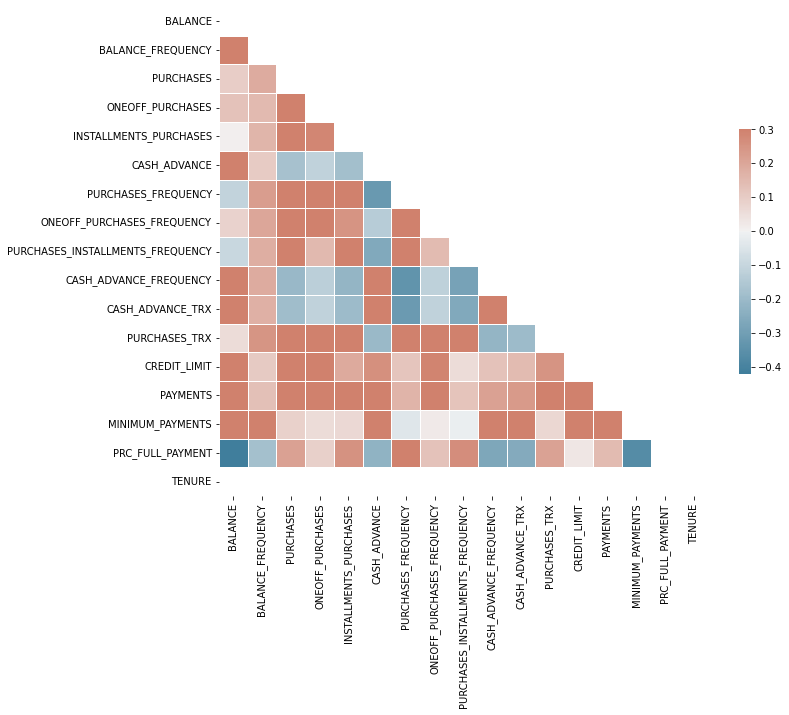

In [15]:
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Task 2: Cluster the creditcard users into sub-groups. Perform a statistical analysis of these groups.
* use a Scikit-Learn clustering clustering to group the users 
* optimize over at lest 3 algorithms and theis hyper-parameters
* analyze the key differences between the user groups: use simple statistics 

In [16]:
def calc_score(model, data):
    y_pred = model.fit_predict(data)
    values, counts = np.unique(y_pred, return_counts=True)
    if len(values) > 1:
        score = silhouette_score(data, model.fit_predict(data))
    else:
        score = 0
    return score

def train_model(model, rand_list, data):
    clf = RandomizedSearchCV(model, rand_list, random_state=0, scoring=calc_score)
    search = clf.fit(data)
    return search.best_params_, search.best_score_

## K-Means

In [17]:
km = KMeans(n_clusters=2)
rand_list = dict(n_clusters=range(2, 25))
params, score = train_model(km, rand_list, data_scaled)
params, score

({'n_clusters': 10}, 0.23591629741439557)

## DBSCAN

In [18]:
db = DBSCAN(min_samples=5)
rand_list = dict(min_samples=range(2, 25))
params, score = train_model(db, rand_list, data_scaled)
params, score

({'min_samples': 12}, 0.08191194762131852)

## AgglomerativeClustering

In [19]:
agg = AgglomerativeClustering(n_clusters=2)
rand_list = dict(n_clusters=range(2, 25))
params, score = train_model(agg, rand_list, data_scaled)
params, score

({'n_clusters': 3}, 0.18883398375955712)

# Analyze the segmentation

calculate clusters with best KMeans result

In [20]:
kmean = KMeans(10)
kmean.fit(data_scaled)
labels = kmean.labels_

apply PCA

In [21]:
dist = 1 - cosine_similarity(data_scaled)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

visualize clusters

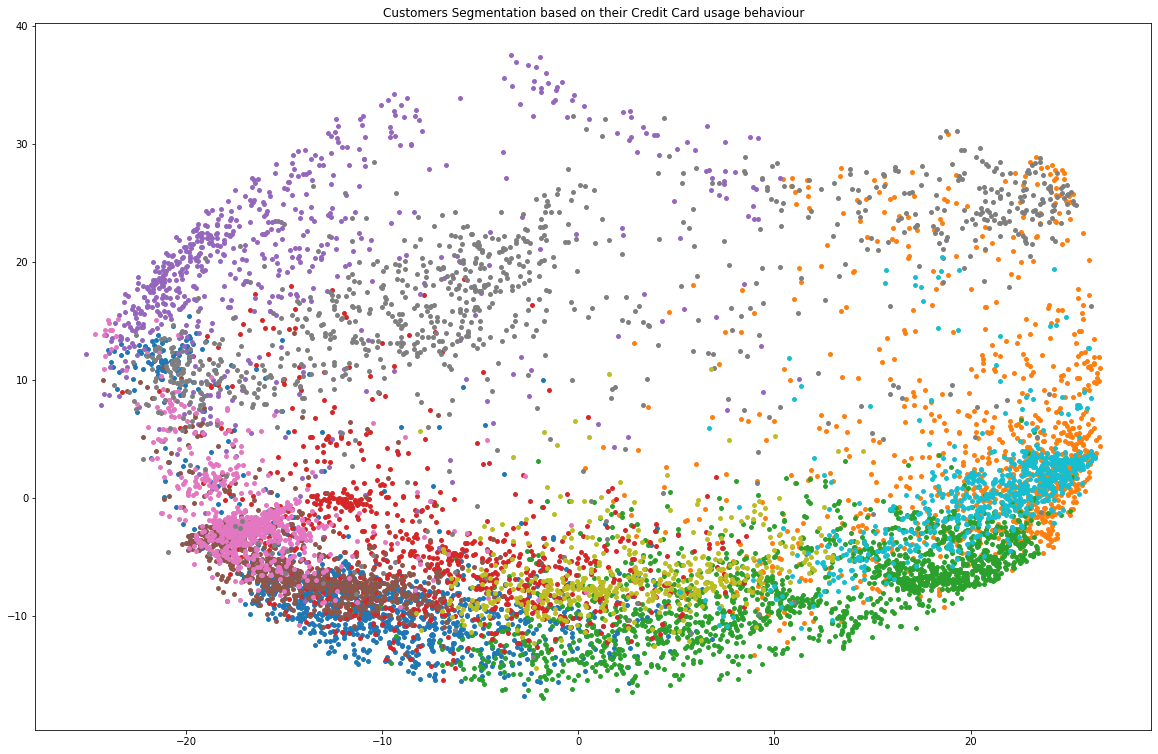

In [22]:
x, y = X_PCA[:, 0], X_PCA[:, 1]
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13))
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour")

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, mec='none')

plt.show()

Referenzen & Inspiration:

* Sourani Sinha. "Data Clustering using KMeans." Kaggle Notebook. https://www.kaggle.com/souravisinha/data-clustering-using-kmeans
* Saba Naseem Butt. "Clustering & Visualization of Clusters using PCA." Kaggle Notebook. https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca
